In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import datetime
import numpy as np
import ml_metrics
from pmdarima.arima import auto_arima

In [2]:
data = pd.read_csv('temperature.csv')

In [3]:
data.index = data['Date']
del data['Date']
data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<AxesSubplot: xlabel='Date'>

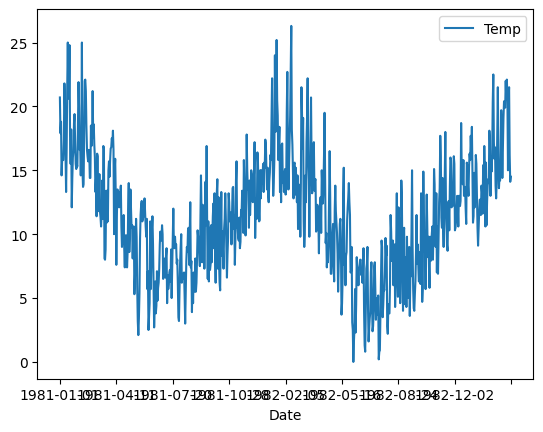

In [4]:
data[:800].plot()

In [5]:
data.isna().sum()

Temp    0
dtype: int64

In [6]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean() 
    rolstd = timeseries.rolling(window=12).std() 
    plt.rcParams["figure.figsize"] = (15,5)
    plt.plot(timeseries, color = 'green', label = 'true data')
    plt.plot(rolmean, color = 'red', label = 'rolling mean')
    plt.plot(rolstd, color = 'black', label = 'std')
    plt.show()

In [7]:
def test_s(data):
    test_stat = adfuller(data)
    if test_stat[0] < test_stat[4]['10%']:
        print(f"p-value {test_stat[1]}, critical values: {test_stat[4]},\n stationary time series")
    else:
        print(f"p-value {test_stat[1]}, critical values: {test_stat[4]}, \n NOT stationary time series")

In [8]:
def decompose(date, model, trend, period):
    decompose_result_mult = seasonal_decompose(data, model=model, extrapolate_trend = trend, period = period)
    decompose_result_mult.plot()
    plt.show()

In [9]:
def metrics(real, forecast):
    forecast=np.array(forecast)
    print('MAD:', round(abs(real-forecast).mean(),4))
    print('MSE:', round(((real-forecast)**2).mean(),4))
    print('MAPE:', round((abs(real-forecast)/real).mean(),4))
    print('MPE:', round(((real-forecast)/real).mean(),4))
    print('Стандартна похибка:', round(((real-forecast)**2).mean()**0.5,4)) 

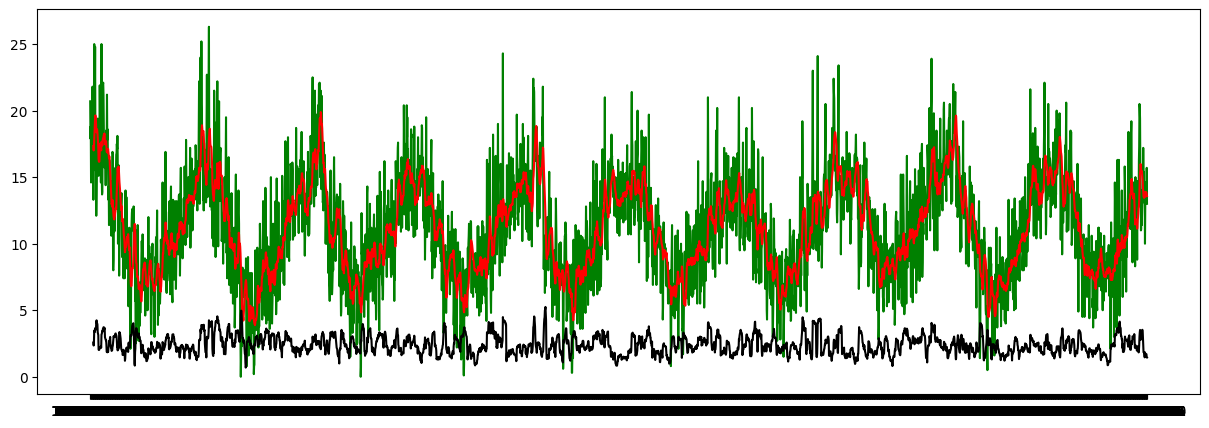

In [10]:
test_stationarity(data)

In [11]:
test_s(data)

p-value 0.0002470826300360998, critical values: {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842},
 stationary time series


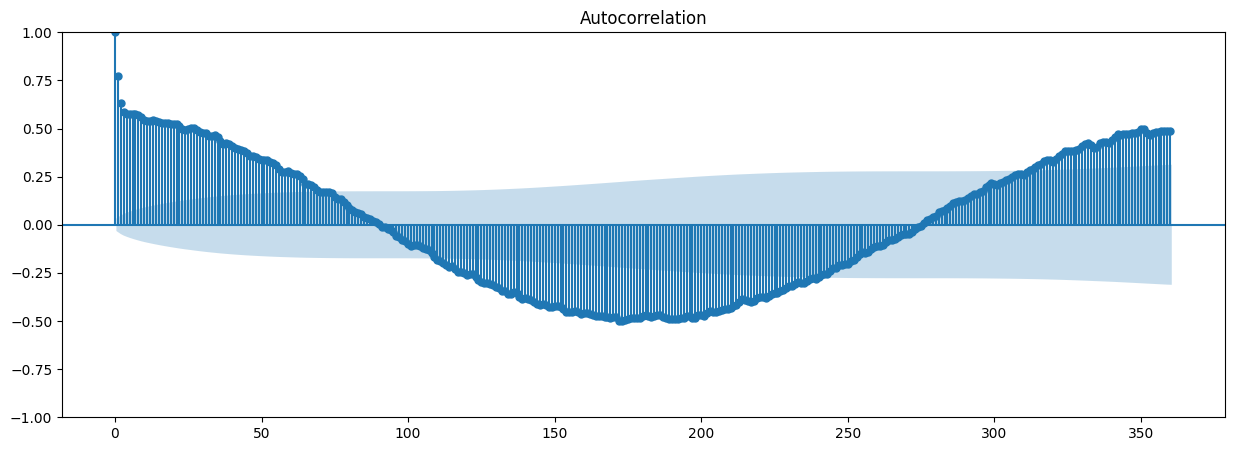

In [12]:
autocorr = plot_acf(data, lags=360)
plt.show()

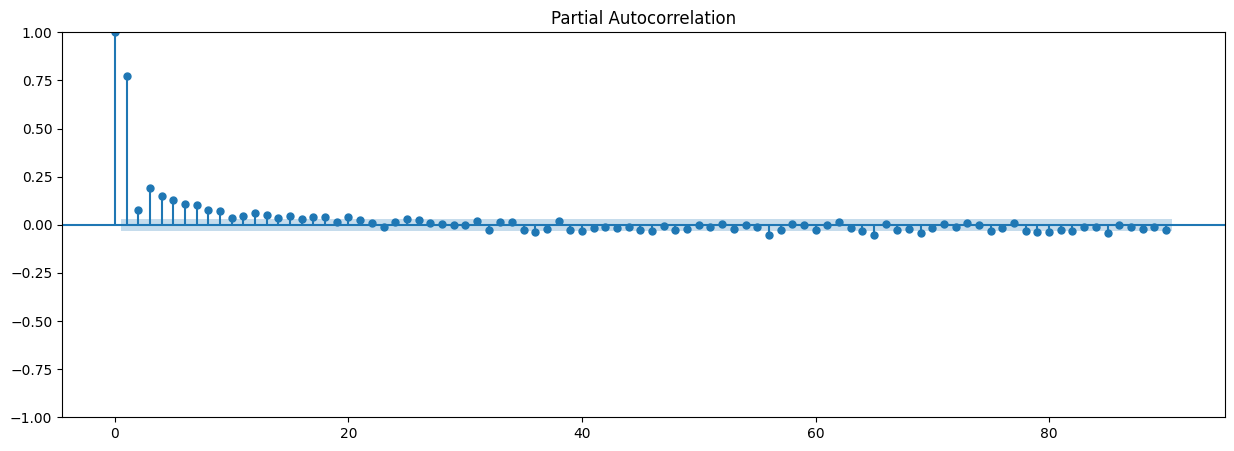

In [13]:
partcorr = plot_pacf(data, lags=90)
plt.show()

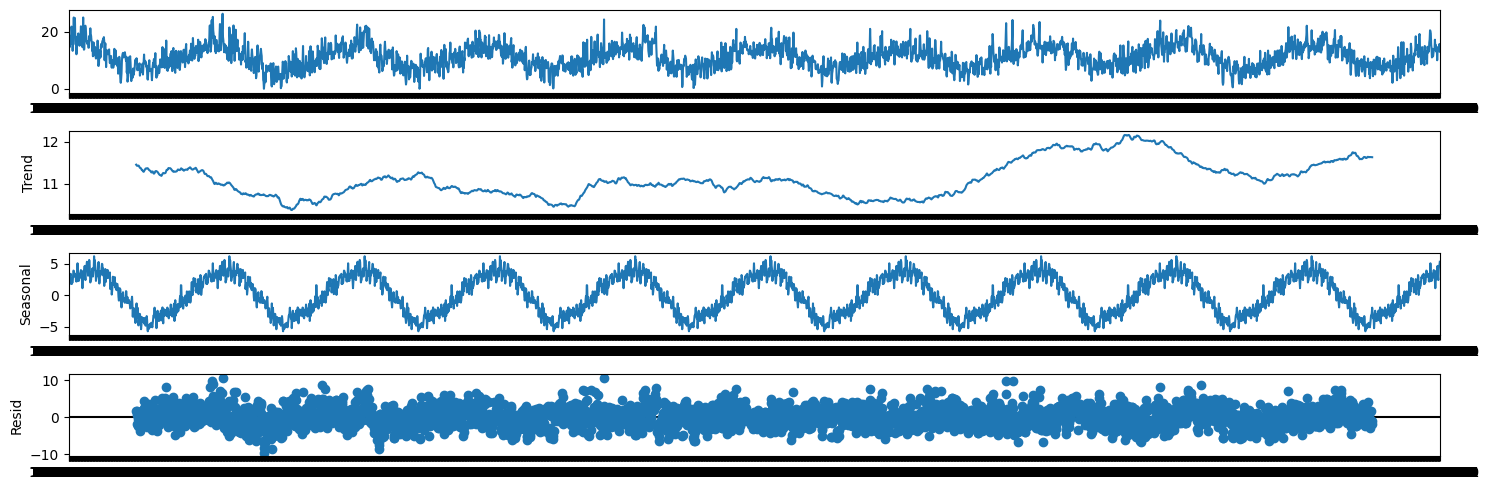

In [14]:
decompose(data, 'add', trend = False, period = 360)

In [15]:
data.shape

(3650, 1)

In [16]:
train = data[:2750]
test = data[2750:]
test.head()

,Temp
Date,
1988-07-14,10.0
1988-07-15,5.3
1988-07-16,6.3
1988-07-17,8.0
1988-07-18,8.3


In [17]:
model = sm.tsa.ExponentialSmoothing(train, trend=None, seasonal='additive', seasonal_periods=360)

In [18]:
fitted = model.fit()

In [19]:
forecast = fitted.forecast(900)

In [20]:
predict = fitted.forecast(1200)

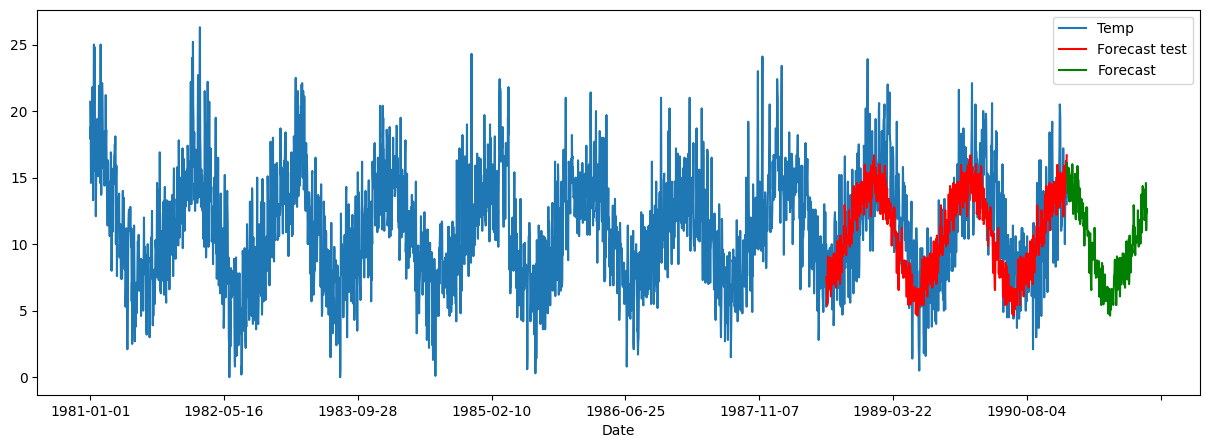

In [21]:
ax = data.plot(label='Actual')
forecast.plot(ax=ax, label='Forecast test', color='r')
predict[900:].plot(ax=ax, label='Forecast', color='g')
ax.legend()

In [22]:
metrics(test.values, forecast.values)

MAD: 4.0905
MSE: 25.7053
MAPE: 0.4659
MPE: -0.14
Стандартна похибка: 5.07
